In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Define the file path
file_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Focused_Library/tertiary_assay/3rd_assay_4fold.csv"

# Load the data into a pandas dataframe
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to verify the data
print(df.head())


   Time(s)      A1      A2      A3      A4      A5      A6      A7      A8  \
0        0  0.6918  0.6868  0.6975  0.7130  0.6628  0.6704  0.6741  0.6653   
1       10  0.6985  0.6890  0.6956  0.7124  0.6649  0.6684  0.6653  0.6576   
2       20  0.7003  0.6927  0.6939  0.7099  0.6647  0.6667  0.6413  0.6497   
3       30  0.7011  0.6939  0.6930  0.7086  0.6609  0.6644  0.6261  0.6430   
4       40  0.7015  0.6948  0.6936  0.7056  0.6571  0.6643  0.6140  0.6364   

       A9  ...      H3      H4      H5      H6      H7      H8      H9  \
0  0.6756  ...  0.6459  0.6911  0.6493  0.6602  0.5926  0.6379  0.6264   
1  0.6573  ...  0.6347  0.6784  0.6401  0.6508  0.5865  0.6422  0.6123   
2  0.6480  ...  0.6261  0.6695  0.6260  0.6437  0.5669  0.6262  0.6077   
3  0.6394  ...  0.6170  0.6602  0.6147  0.6385  0.5570  0.6113  0.5965   
4  0.6292  ...  0.6108  0.6553  0.6053  0.6310  0.5555  0.6057  0.5842   

      H10     H11     H12  
0  0.6598  0.6693  0.6704  
1  0.6547  0.6680  0.6632  
2 

In [3]:
# Function to calculate the slope and evaluate the goodness of fit

def calculate_slope(time_data, absorbance_data, start_time, end_time, threshold=0.95):
    # Filter the data for the given time window
    mask = (time_data >= start_time) & (time_data <= end_time)
    x = time_data[mask].values.reshape(-1, 1)
    y = absorbance_data[mask].values
    
    # Perform linear regression
    model = LinearRegression().fit(x, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(x, y)
    
    # Check the goodness of fit
    if r_squared < threshold:
        return None, r_squared
    return slope, r_squared


# The first column is 'Time' and the rest are well data (A1 to H12)
time_data = df['Time(s)']
well_data = df.drop(columns=['Time(s)'])

# Dictionary to store slopes and R-squared values
slopes = {}
r_squared_values = {}

# Plot each well in a subplot and calculate the slope
for well in well_data.columns:
    slope, r_squared = None, 0
    start_time, end_time = 20,50
    
    # Adjust the window if the goodness of fit is not satisfactory
    while r_squared < 0.95 and end_time <= 600:
        slope, r_squared = calculate_slope(time_data, df[well], start_time, end_time)
        if slope is not None:
            break
        start_time += 10
        end_time += 10
    
    # Store the results
    slopes[well] = slope
    r_squared_values[well] = r_squared

# Display the slopes and R-squared values
slopes_df = pd.DataFrame({'Well': list(slopes.keys()), 'Slope': list(slopes.values()), 'R_squared': list(r_squared_values.values())})

# Print the dataframe
print(slopes_df)

   Well     Slope  R_squared
0    A1  0.000058   0.983626
1    A2  0.000111   0.995636
2    A3  0.000010   1.000000
3    A4 -0.000222   0.980191
4    A5 -0.000192   0.951575
..  ...       ...        ...
91   H8 -0.000752   0.958351
92   H9 -0.001137   0.998944
93  H10 -0.000460   0.996609
94  H11 -0.000635   0.972623
95  H12 -0.000497   0.997714

[96 rows x 3 columns]


In [4]:
# Load the data from the Excel file
file_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Data/240612/240612_bradford2.xlsx"
df_bradford = pd.read_excel(file_path,header=None)
df_bradford = df_bradford.drop(columns=[0])
df_bradford = df_bradford.drop(0).reset_index(drop=True)
# Display the first few rows to verify the data
#print(df_bradford.head())

# Extract the well labels and absorbance values
row_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
col_labels = range(1, 13)

# Initialize an empty dictionary to store the absorbance values
well_dict = {}

# Populate the dictionary with well identifiers and corresponding absorbance values
for i, row in enumerate(row_labels):
    for j, col in enumerate(col_labels):
        well_id = f"{row}{col}"
        well_dict[well_id] = df_bradford.iloc[i, j]

# Define the formula to calculate the concentration
def calculate_concentration_bradford(absorbance):
    try:
        return ((float(absorbance) - 0.1410320352) / 1.8699062817)*10
    except ValueError:
        return np.nan

# Apply the formula to calculate the concentration for each well
concentration_dict = {well: calculate_concentration_bradford(absorbance) for well, absorbance in well_dict.items()}

# Convert the concentration dictionary back to a DataFrame for visualization and saving
concentration_df = pd.DataFrame(list(concentration_dict.items()), columns=['Well', 'Concentration'])

# Display the concentration data
print("Concentration data:")
print(concentration_df.head())

# Save the concentration data to a new Excel file
#output_file_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Data/240612/240612_bradford2_concentration.xlsx"
#concentration_df.to_excel(output_file_path, index=False)

Concentration data:
  Well  Concentration
0   A1       0.750134
1   A2       0.821260
2   A3       0.735694
3   A4       0.745321
4   A5       0.942122


In [5]:
# Display the first few rows of slopes_df and concentration_df to verify the data
print("slopes_df:")
print(slopes_df.head())

print("concentration_df:")
print(concentration_df.head())

# Assign the concentration value from concentration_df to each row in slopes_df based on the well name
slopes_df = slopes_df.merge(concentration_df, left_on='Well', right_on='Well', how='left')

# Display the updated slopes_df with concentration values
print("Updated slopes_df with concentration values:")
print(slopes_df.head())

slopes_df:
  Well     Slope  R_squared
0   A1  0.000058   0.983626
1   A2  0.000111   0.995636
2   A3  0.000010   1.000000
3   A4 -0.000222   0.980191
4   A5 -0.000192   0.951575
concentration_df:
  Well  Concentration
0   A1       0.750134
1   A2       0.821260
2   A3       0.735694
3   A4       0.745321
4   A5       0.942122
Updated slopes_df with concentration values:
  Well     Slope  R_squared  Concentration
0   A1  0.000058   0.983626       0.750134
1   A2  0.000111   0.995636       0.821260
2   A3  0.000010   1.000000       0.735694
3   A4 -0.000222   0.980191       0.745321
4   A5 -0.000192   0.951575       0.942122


In [6]:
# Calculate the average slope of negative controls (A1 to A3)
negative_controls = ['A1', 'A2', 'A3']
negative_control_avg = slopes_df[slopes_df['Well'].isin(negative_controls)]['Slope'].mean()

# Normalize slopes by subtracting the average negative control slope
slopes_df['Normalized_Slope'] = slopes_df['Slope'] - negative_control_avg



# Calculate the average concentration of A4, A5, and A6 as the WT concentration
wt_wells = ['A4', 'A5', 'A6']
wt_concentration = slopes_df[slopes_df['Well'].isin(wt_wells)]['Concentration'].mean()

print(f"WT concentration (average of A4, A5, A6): {wt_concentration}")

# Calculate the ratio of the concentration of each well to the average WT concentration
slopes_df['Concentration_Ratio'] = slopes_df['Concentration'] / wt_concentration

# Normalize the slope of each well using the concentration ratio
slopes_df['Normalized_Slope_by_Concentration'] = slopes_df['Normalized_Slope'] / slopes_df['Concentration_Ratio']

# Display the updated slopes_df with normalized slopes
print("Updated slopes_df with normalized slopes:")
print(slopes_df.head())

WT concentration (average of A4, A5, A6): 0.876343199102756
Updated slopes_df with normalized slopes:
  Well     Slope  R_squared  Concentration  Normalized_Slope  \
0   A1  0.000058   0.983626       0.750134         -0.000002   
1   A2  0.000111   0.995636       0.821260          0.000051   
2   A3  0.000010   1.000000       0.735694         -0.000050   
3   A4 -0.000222   0.980191       0.745321         -0.000282   
4   A5 -0.000192   0.951575       0.942122         -0.000252   

   Concentration_Ratio  Normalized_Slope_by_Concentration  
0             0.855982                          -0.000002  
1             0.937145                           0.000055  
2             0.839505                          -0.000059  
3             0.850489                          -0.000331  
4             1.075060                          -0.000234  


In [7]:

# Calculate the average slope of wild-type controls (A4 to A6)
wild_type_controls = ['A4', 'A5', 'A6']
wild_type_avg = slopes_df[slopes_df['Well'].isin(wild_type_controls)]['Normalized_Slope_by_Concentration'].mean()

# Calculate the ratio of each well's normalized slope to the wild-type average slope
slopes_df['Ratio_to_WT'] = slopes_df['Normalized_Slope_by_Concentration'] / wild_type_avg
print(slopes_df.head())

  Well     Slope  R_squared  Concentration  Normalized_Slope  \
0   A1  0.000058   0.983626       0.750134         -0.000002   
1   A2  0.000111   0.995636       0.821260          0.000051   
2   A3  0.000010   1.000000       0.735694         -0.000050   
3   A4 -0.000222   0.980191       0.745321         -0.000282   
4   A5 -0.000192   0.951575       0.942122         -0.000252   

   Concentration_Ratio  Normalized_Slope_by_Concentration  Ratio_to_WT  
0             0.855982                          -0.000002     0.008193  
1             0.937145                           0.000055    -0.230492  
2             0.839505                          -0.000059     0.248945  
3             0.850489                          -0.000331     1.393570  
4             1.075060                          -0.000234     0.985043  


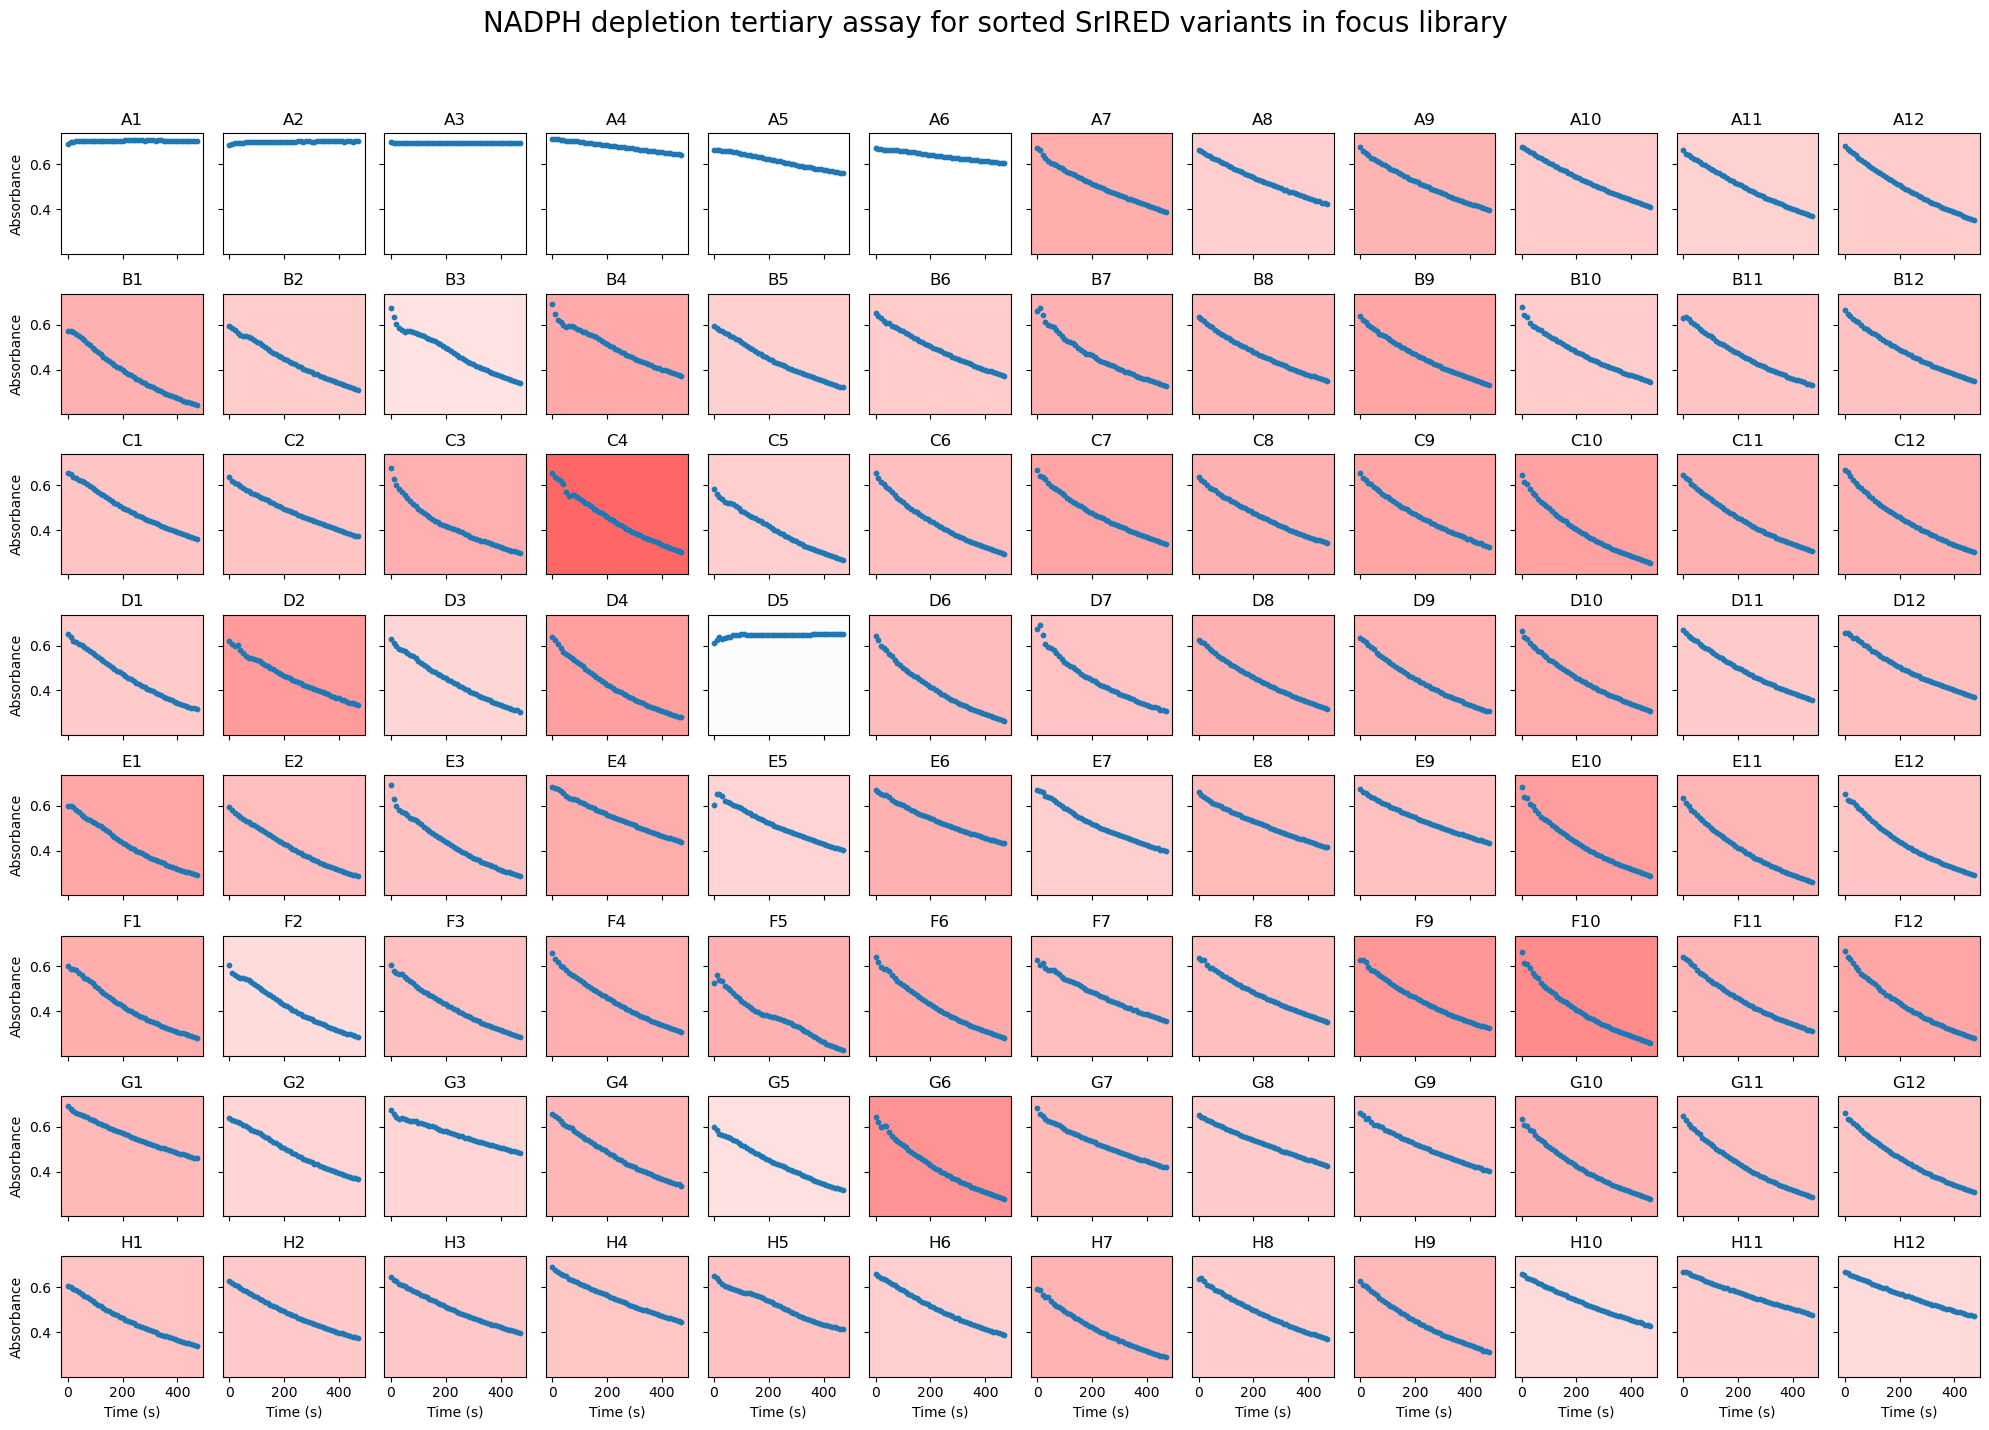

In [8]:
# Normalize the Ratio_to_WT values from 0 to 1
min_ratio = slopes_df['Ratio_to_WT'].min()
max_ratio = slopes_df['Ratio_to_WT'].max()
slopes_df['Normalized_Ratio_to_WT'] = (slopes_df['Ratio_to_WT'] - min_ratio) / (max_ratio - min_ratio)

# Define the color map
def ratio_to_color(ratio,normalized_ratio):
    if ratio < 1:
        return mcolors.to_rgba('lightblue', alpha=0.6 * normalized_ratio)
    elif ratio == 1:
        return mcolors.to_rgba('white', alpha=0.6)
    else:
        return mcolors.to_rgba('red', alpha=0.6 * normalized_ratio)

# Create a figure with 96 subplots (8x12 grid)
fig, axes = plt.subplots(8, 12, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('NADPH depletion tertiary assay for sorted SrIRED variants in focus library', fontsize=20)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each well in a subplot
for i, well in enumerate(well_data.columns):
    ax = axes[i]
    ax.scatter(time_data, df[well], s=10)
    ax.set_title(well)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Absorbance')
    ax.label_outer()
    
    # Set background color based on Normalized_Ratio_to_WT
    if well in negative_controls + wild_type_controls:
        ax.set_facecolor('white')
    else:
        ratio = slopes_df[slopes_df['Well'] == well]['Ratio_to_WT'].values[0]
        normalized_ratio = slopes_df[slopes_df['Well'] == well]['Normalized_Ratio_to_WT'].values[0]
        ax.set_facecolor(ratio_to_color(ratio,normalized_ratio))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the figure
figure_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Focused_Library/tertiary_assay/whole_plate_result.png"
plt.savefig(figure_path)

# Save the slopes_df dataframe to a CSV file
csv_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Focused_Library/tertiary_assay/whole_plate_slope.csv"
slopes_df.to_csv(csv_path, index=False)

plt.show()

In [13]:
slopes_df

,Well,Slope,R_squared,Concentration,Normalized_Slope,Normalized_Slope_by_Concentration,Ratio_to_WT,Normalized_Ratio_to_WT
0,A1,0.000058,0.983626,0.750134,-0.000002,-0.000002,0.008193,0.029663
1,A2,0.000111,0.995636,0.821260,0.000051,0.000063,-0.230492,0.000000
2,A3,0.000010,1.000000,0.735694,-0.000050,-0.000068,0.248945,0.059582
3,A4,-0.000222,0.980191,0.745321,-0.000282,-0.000378,1.393570,0.201831
4,A5,-0.000192,0.951575,0.942122,-0.000252,-0.000267,0.985043,0.151061
...,...,...,...,...,...,...,...,...
91,H8,-0.000752,0.958351,1.219141,-0.000812,-0.000666,2.455050,0.333747
92,H9,-0.001137,0.998944,1.261389,-0.001197,-0.000949,3.498329,0.463401
93,H10,-0.000460,0.996609,1.112719,-0.000520,-0.000467,1.722170,0.242668
94,H11,-0.000635,0.972623,1.042662,-0.000695,-0.000666,2.456799,0.333964


In [9]:
# Group wells into triplicates and calculate average slopes and average Ratio_to_WT
triplicate_groups = {
    'Negative Control': ['A1', 'A2', 'A3'],
    'WT': ['A4', 'A5', 'A6'],
    'Plate 1 A11': ['A7', 'A8', 'A9'],
    'Plate 1 B8': ['A10', 'A11', 'A12'],
    'Plate 1 C9': ['B1', 'B2', 'B3'],
    'Plate 1 E10': ['B4', 'B5', 'B6'],
    'Plate 1 G3': ['B7', 'B8', 'B9'],
    'Plate 1 G4': ['B10', 'B11', 'B12'],
    'Plate 1 H2': ['C1', 'C2', 'C3'],
    'Plate 2 A7': [ 'C5', 'C6'],
    'Plate 2 D7': ['C7', 'C8', 'C9'],
    'Plate 2 E10': ['C10', 'C11', 'C12'],
    'Plate 2 F1': ['D1', 'D2', 'D3'],
    'Plate 2 F2': ['D4', 'D6'],
    'Plate 2 G11': ['D7', 'D8', 'D9'],
    'Plate 3 E2': ['D10', 'D11', 'D12'],
    'Plate 3 E10': ['E1', 'E2', 'E3'],
    'Plate 4 C6': ['E4', 'E5', 'E6'],
    'Plate 4 D10': ['E7', 'E8', 'E9'],
    'Plate 4 F7': ['E10', 'E11', 'E12'],
    'Plate 4 H5': ['F1', 'F2', 'F3'],
    'Plate 5 B11': ['F4', 'F5', 'F6'],
    'Plate 5 C1': ['F7', 'F8', 'F9'],
    'Plate 5 G1': ['F10', 'F11', 'F12'],
    'Plate 5 G10': ['G1', 'G2', 'G3'],
    'Plate 6 B1': ['G4', 'G6'],
    'Plate 6 C6': ['G7', 'G8', 'G9'],
    'Plate 6 D7': ['G10', 'G11', 'G12'],
    'Plate 6 F1': ['H1', 'H2', 'H3'],
    'Plate 6 F5': ['H4', 'H5', 'H6'],
    'Plate 6 F12': ['H7', 'H8', 'H9'],
    'Plate 6 H6': ['H10', 'H11', 'H12']
}

average_slopes = []
for group_name, wells in triplicate_groups.items():
    avg_slope = slopes_df[slopes_df['Well'].isin(wells)]['Normalized_Slope_by_Concentration'].mean()
    avg_ratio_to_wt = slopes_df[slopes_df['Well'].isin(wells)]['Ratio_to_WT'].mean()
    stddev_ratio_to_wt = slopes_df[slopes_df['Well'].isin(wells)]['Ratio_to_WT'].std()
    average_slopes.append({'Group': group_name, 'Average_Slope': avg_slope, 'Average_Ratio_to_WT': avg_ratio_to_wt, 'Stddev_Ratio_to_WT': stddev_ratio_to_wt})
average_slopes_df = pd.DataFrame(average_slopes)

# Display the average slopes and average Ratio_to_WT for the triplicates
print(average_slopes_df)

               Group  Average_Slope  Average_Ratio_to_WT  Stddev_Ratio_to_WT
0   Negative Control      -0.000002             0.008882            0.239719
1                 WT      -0.000238             1.000000            0.386309
2        Plate 1 A11      -0.000797             3.355449            0.951324
3         Plate 1 B8      -0.000562             2.364541            0.189791
4         Plate 1 C9      -0.000610             2.566618            1.321271
5        Plate 1 E10      -0.000712             2.994439            1.065409
6         Plate 1 G3      -0.000951             4.000145            0.456260
7         Plate 1 G4      -0.000654             2.750823            0.285609
8         Plate 1 H2      -0.000763             3.210055            0.660650
9         Plate 2 A7      -0.000656             2.758554            0.555878
10        Plate 2 D7      -0.001024             4.309540            0.344400
11       Plate 2 E10      -0.000985             4.143351            0.485125

In [10]:
# Save the average slopes dataframe to a CSV file
average_slopes_csv_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Focused_Library/tertiary_assay/3rd_assay_4fold_average_slopes.csv"
average_slopes_df.to_csv(average_slopes_csv_path, index=False)

          Group  Average_Slope  Average_Ratio_to_WT  Stddev_Ratio_to_WT
23   Plate 5 G1      -0.001107             4.658816            1.124276
25   Plate 6 B1      -0.001077             4.529985            1.282747
10   Plate 2 D7      -0.001024             4.309540            0.344400
11  Plate 2 E10      -0.000985             4.143351            0.485125
13   Plate 2 F2      -0.000967             4.069304            1.073274
21  Plate 5 B11      -0.000963             4.050849            0.147233
6    Plate 1 G3      -0.000951             4.000145            0.456260
22   Plate 5 C1      -0.000920             3.872887            1.187140
19   Plate 4 F7      -0.000896             3.771588            1.028853
16  Plate 3 E10      -0.000842             3.543850            0.773089
14  Plate 2 G11      -0.000840             3.533533            0.526371
2   Plate 1 A11      -0.000797             3.355449            0.951324
17   Plate 4 C6      -0.000795             3.346285            1

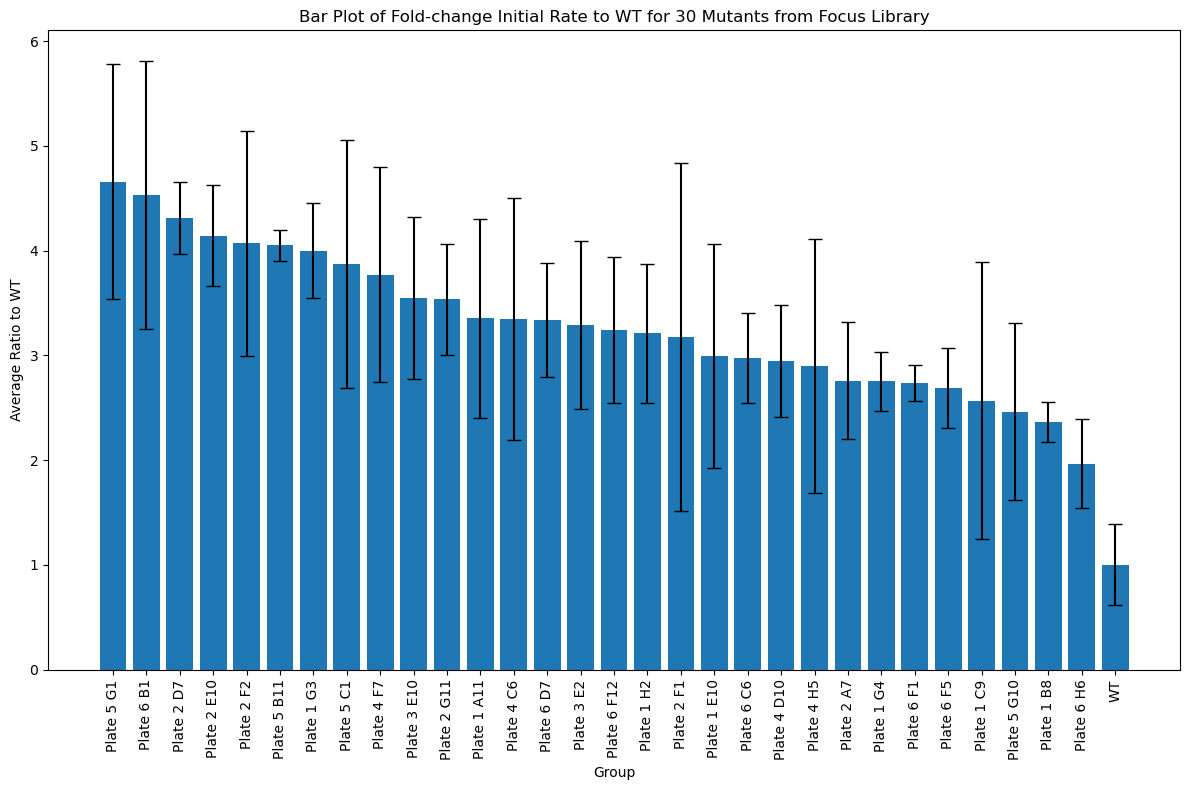

In [11]:
# Rank the groups from highest to lowest based on Average_Ratio_to_WT
ranked_slopes_df = average_slopes_df.sort_values(by='Average_Ratio_to_WT', ascending=False)
ranked_slopes_df_for_plot = ranked_slopes_df[ranked_slopes_df['Group'] != 'Negative Control']
# Display the ranked slopes dataframe
print(ranked_slopes_df_for_plot)

# Plot a bar plot of Average_Ratio_to_WT for the top 30 groups
plt.figure(figsize=(12, 8))
plt.bar(ranked_slopes_df_for_plot['Group'], ranked_slopes_df_for_plot['Average_Ratio_to_WT'], yerr=ranked_slopes_df_for_plot['Stddev_Ratio_to_WT'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('Average Ratio to WT')
plt.title('Bar Plot of Fold-change Initial Rate to WT for 30 Mutants from Focus Library')
plt.tight_layout()
plt.show()
# Save the ranked slopes dataframe to a CSV file
ranked_slopes_csv_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Focused_Library/tertiary_assay/3rd_assay_4fold_ranked_average_slopes_with_ratios.csv"
ranked_slopes_df.to_csv(ranked_slopes_csv_path, index=False)

Without normalization by concentration


In [5]:
slopes_df

,Well,Slope,R_squared
0,A1,0.000058,0.983626
1,A2,0.000111,0.995636
2,A3,0.000010,1.000000
3,A4,-0.000222,0.980191
4,A5,-0.000192,0.951575
...,...,...,...
91,H8,-0.000752,0.958351
92,H9,-0.001137,0.998944
93,H10,-0.000460,0.996609
94,H11,-0.000635,0.972623


In [6]:
# Calculate the average slope of negative controls (A1 to A3)
negative_controls = ['A1', 'A2', 'A3']
negative_control_avg = slopes_df[slopes_df['Well'].isin(negative_controls)]['Slope'].mean()

# Normalize slopes by subtracting the average negative control slope
slopes_df['Normalized_Slope'] = slopes_df['Slope'] - negative_control_avg

# Calculate the average slope of wild-type controls (A4 to A6)
wild_type_controls = ['A4', 'A5', 'A6']
wild_type_avg = slopes_df[slopes_df['Well'].isin(wild_type_controls)]['Normalized_Slope'].mean()

# Calculate the ratio of each well's normalized slope to the wild-type average slope
slopes_df['Ratio_to_WT'] = slopes_df['Normalized_Slope'] / wild_type_avg

# Display the dataframe
print(slopes_df)

   Well     Slope  R_squared  Normalized_Slope  Ratio_to_WT
0    A1  0.000058   0.983626         -0.000002     0.007225
1    A2  0.000111   0.995636          0.000051    -0.222543
2    A3  0.000010   1.000000         -0.000050     0.215318
3    A4 -0.000222   0.980191         -0.000282     1.221098
4    A5 -0.000192   0.951575         -0.000252     1.091040
..  ...       ...        ...               ...          ...
91   H8 -0.000752   0.958351         -0.000812     3.518786
92   H9 -0.001137   0.998944         -0.001197     5.187861
93  H10 -0.000460   0.996609         -0.000520     2.252890
94  H11 -0.000635   0.972623         -0.000695     3.011561
95  H12 -0.000497   0.997714         -0.000557     2.413295

[96 rows x 5 columns]


In [8]:
# Group wells into triplicates and calculate average slopes and average Ratio_to_WT
triplicate_groups = {
    'Negative Control': ['A1', 'A2', 'A3'],
    'WT': ['A4', 'A5', 'A6'],
    'Plate 1 A11': ['A7', 'A8', 'A9'],
    'Plate 1 B8': ['A10', 'A11', 'A12'],
    'Plate 1 C9': ['B1', 'B2', 'B3'],
    'Plate 1 E10': ['B4', 'B5', 'B6'],
    'Plate 1 G3': ['B7', 'B8', 'B9'],
    'Plate 1 G4': ['B10', 'B11', 'B12'],
    'Plate 1 H2': ['C1', 'C2', 'C3'],
    'Plate 2 A7': [ 'C5', 'C6'],
    'Plate 2 D7': ['C7', 'C8', 'C9'],
    'Plate 2 E10': ['C10', 'C11', 'C12'],
    'Plate 2 F1': ['D1', 'D2', 'D3'],
    'Plate 2 F2': ['D4', 'D6'],
    'Plate 2 G11': ['D7', 'D8', 'D9'],
    'Plate 3 E2': ['D10', 'D11', 'D12'],
    'Plate 3 E10': ['E1', 'E2', 'E3'],
    'Plate 4 C6': ['E4', 'E5', 'E6'],
    'Plate 4 D10': ['E7', 'E8', 'E9'],
    'Plate 4 F7': ['E10', 'E11', 'E12'],
    'Plate 4 H5': ['F1', 'F2', 'F3'],
    'Plate 5 B11': ['F4', 'F5', 'F6'],
    'Plate 5 C1': ['F7', 'F8', 'F9'],
    'Plate 5 G1': ['F10', 'F11', 'F12'],
    'Plate 5 G10': ['G1', 'G2', 'G3'],
    'Plate 6 B1': ['G4', 'G6'],
    'Plate 6 C6': ['G7', 'G8', 'G9'],
    'Plate 6 D7': ['G10', 'G11', 'G12'],
    'Plate 6 F1': ['H1', 'H2', 'H3'],
    'Plate 6 F5': ['H4', 'H5', 'H6'],
    'Plate 6 F12': ['H7', 'H8', 'H9'],
    'Plate 6 H6': ['H10', 'H11', 'H12']
}

average_slopes = []
for group_name, wells in triplicate_groups.items():
    avg_slope = slopes_df[slopes_df['Well'].isin(wells)]['Normalized_Slope'].mean()
    avg_ratio_to_wt = slopes_df[slopes_df['Well'].isin(wells)]['Ratio_to_WT'].mean()
    stddev_ratio_to_wt = slopes_df[slopes_df['Well'].isin(wells)]['Ratio_to_WT'].std()
    average_slopes.append({'Group': group_name, 'Average_Slope': avg_slope, 'Average_Ratio_to_WT': avg_ratio_to_wt, 'Stddev_Ratio_to_WT': stddev_ratio_to_wt})
average_slopes_df = pd.DataFrame(average_slopes)

# Display the average slopes and average Ratio_to_WT for the triplicates
print(average_slopes_df)

               Group  Average_Slope  Average_Ratio_to_WT  Stddev_Ratio_to_WT
0   Negative Control   2.258755e-21        -1.850372e-17            0.219020
1                 WT  -2.306667e-04         1.000000e+00            0.278032
2        Plate 1 A11  -9.740000e-04         4.222543e+00            1.117601
3         Plate 1 B8  -8.833333e-04         3.829480e+00            0.526147
4         Plate 1 C9  -7.603333e-04         3.296243e+00            1.176497
5        Plate 1 E10  -8.843333e-04         3.833815e+00            0.951610
6         Plate 1 G3  -1.084333e-03         4.700867e+00            0.292569
7         Plate 1 G4  -9.276667e-04         4.021676e+00            0.865968
8         Plate 1 H2  -9.853333e-04         4.271676e+00            1.879056
9         Plate 2 A7  -9.926667e-04         4.303468e+00            0.582443
10        Plate 2 D7  -1.231000e-03         5.336705e+00            0.762985
11       Plate 2 E10  -1.508333e-03         6.539017e+00            0.706718

In [9]:
# Save the average slopes dataframe to a CSV file
average_slopes_csv_path = "/Users/Zachary/Library/CloudStorage/OneDrive-UniversityofCambridge/Project/Focused_Library/tertiary_assay/3rd_assay_average_slopes_raw.csv"
average_slopes_df.to_csv(average_slopes_csv_path, index=False)